In [25]:
# Panutad Sirikul
# 650510714

## 1. Download the Vehicle dataset from https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

In [2]:
# Inspect variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Identify a linear relationship between numerical variables
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Feature Engineering/car_prices.csv')

## 2. Explore the dataset using what you have learnt from this workshop

In [5]:
data.head() # Overview of data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [6]:
data.dtypes # แต่ละตัวแปรมี Data type เป็นอะไรบ้าง?

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [7]:
data.shape # Data มีกี่แถวและมีกี่คอลัมน์?

(558837, 16)

In [8]:
data.describe() # มีตัวแปรใดบ้างที่สามารถนำมาคำนวณได้

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [9]:
data['color'].unique() # มีรถสีอะไรบ้าง?

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

In [10]:
data['color'].nunique() # มีสีรถทั้งหมดกี่สี?

46

In [11]:
data['interior'].unique() # มีสีภายในรถสีอะไรบ้าง?

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [12]:
data['make'].unique() # มียี่ห้อผู้ผลิตรถยนต์อะไรบ้าง?

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [13]:
data['make'].nunique() # มียี่ห้อผู้ผลิตรถยนต์จำนวนกี่ยี่ห้อ?

96

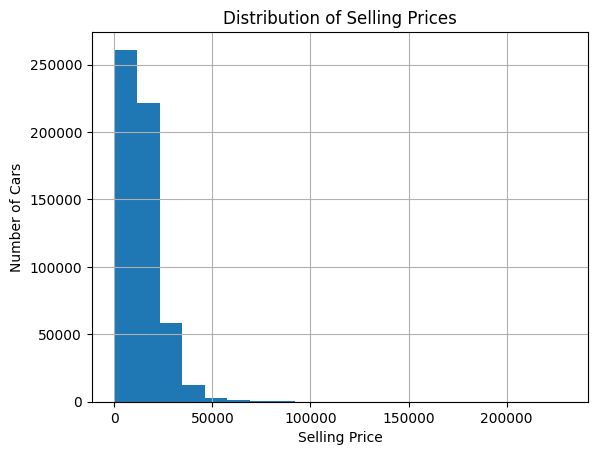

In [14]:
# ราคาขายของรถยนต์ (x-axis) ต่อ จำนวนรถยนต์ (y-axis)
data['sellingprice'].hist(bins=20)
plt.xlabel('Selling Price')
plt.ylabel('Number of Cars')
plt.title('Distribution of Selling Prices')
plt.show()

In [15]:
data.nunique() # จำนวนของค่าที่ไม่ซ้ำกันในแต่ละคอลัมน์

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

Text(0.5, 1.0, 'Cardinality')

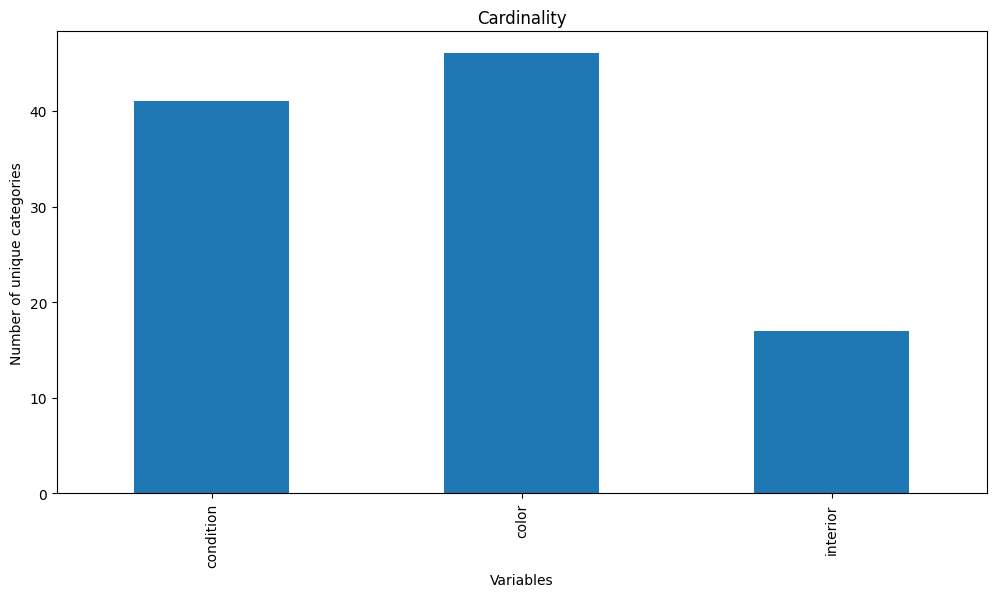

In [16]:
# จำนวนของสภาพรถ, สีรถ, และสีภายในรถ
data[['condition', 'color', 'interior']].nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [17]:
data['body'].unique() # ประเภทของรถยนต์

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

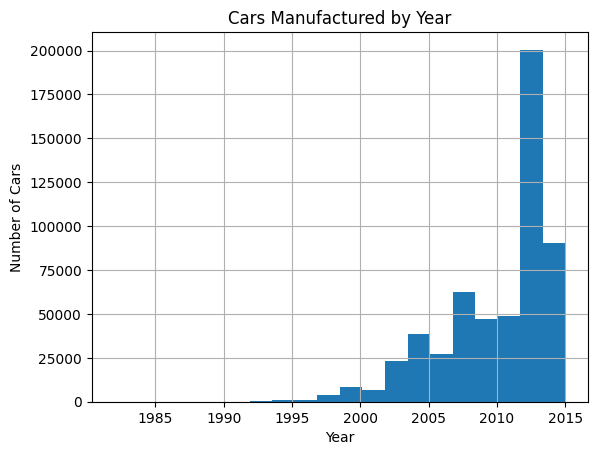

In [18]:
# ปีที่ผลิตรถเทียบกับจำนวนรถที่ผลิตในปีนั้น
data['year'].hist(bins=20)
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Cars Manufactured by Year')
plt.show()

In [19]:
data['transmission'].unique() # รูปแบบเกียร์

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In [20]:
# หาความถี่ที่รถจะมีระบบเกียร์แต่ละแบบ
label_freq = data['transmission'].value_counts() / len(data)
print(label_freq)

transmission
automatic    0.851617
manual       0.031394
sedan        0.000027
Sedan        0.000020
Name: count, dtype: float64


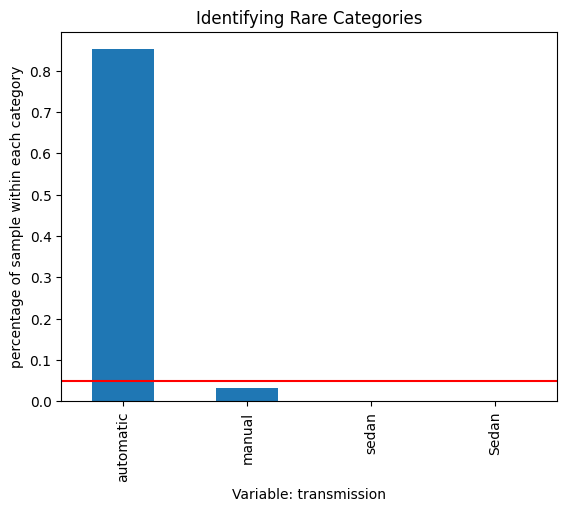

In [21]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red') #make a red line of 5%
fig.set_ylabel('percentage of sample within each category')
fig.set_xlabel('Variable: transmission')
fig.set_title('Identifying Rare Categories')
plt.show()

In [22]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [27]:
# Identify a linear relationship between numerical variables
# ราคาสองแบบนี้มีความสัมพันธ์กันอย่างไร?
data[['mmr', 'sellingprice']]

,mmr,sellingprice
0,20500.0,21500.0
1,20800.0,21500.0
2,31900.0,30000.0
3,27500.0,27750.0
4,66000.0,67000.0
...,...,...
558832,35300.0,33000.0
558833,30200.0,30800.0
558834,29800.0,34000.0
558835,15100.0,11100.0


In [28]:
# สร้าง DataFrame ใหม่ขึ้นมา
mmr = data['mmr']
sellingprice = data['sellingprice']

price_data = pd.DataFrame([mmr, sellingprice]).T
price_data.columns = ['mmr', 'sellingprice']
price_data.head()

,mmr,sellingprice
0,20500.0,21500.0
1,20800.0,21500.0
2,31900.0,30000.0
3,27500.0,27750.0
4,66000.0,67000.0


Text(0.5, 28.999999999999986, 'Independent variable')

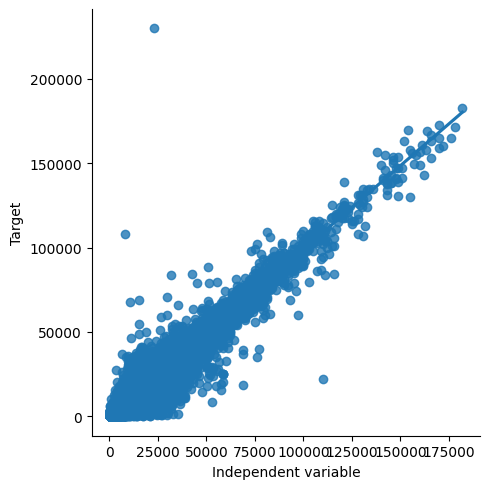

In [33]:
sns.lmplot(x="mmr", y="sellingprice", data=price_data, order=1)
plt.ylabel("Target")
plt.xlabel("Independent variable")

<ipython-input-35-52f267aa0a5b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_data['mmr'], bins=30)


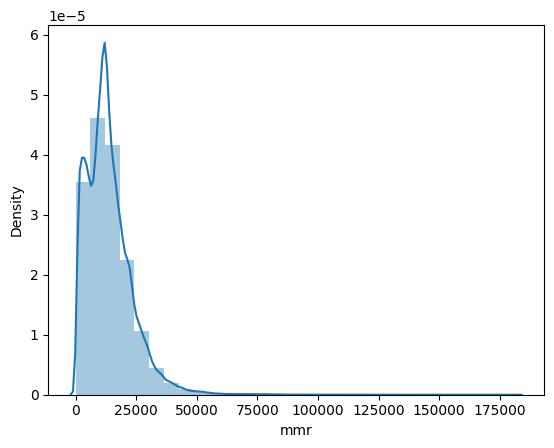

In [35]:
sns.distplot(price_data['mmr'], bins=30)
plt.show()

<ipython-input-36-874753552aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_data['sellingprice'], bins=30)


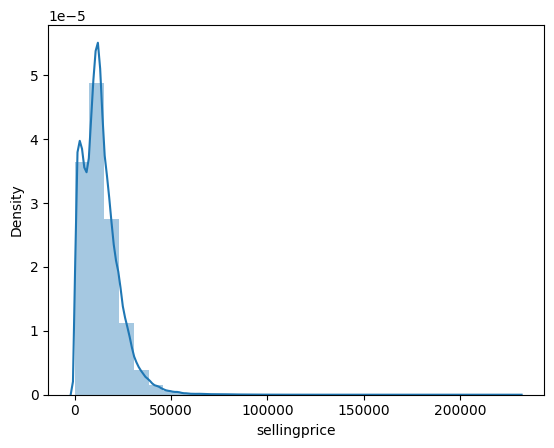

In [36]:
sns.distplot(price_data['sellingprice'], bins=30)
plt.show()

## 3. Export your python notebook (file format: .ipynb) and submit to assignment submission system (http://hw.cs.science.cmu.ac.th/)